In [1]:
# YOUR CODE HERE
import numpy as np

from tqdm.auto import trange

import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import DataLoader, SubsetRandomSampler
# import torch.optim as optim

import torchvision
from torchvision import datasets, transforms


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

/home/pettepiero/local/envs/atml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing dataset

In [2]:
train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor,
    download=True
)

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = len(train_dataset),
                          shuffle = False)

test_loader = DataLoader(dataset = test_dataset,
                          batch_size = len(test_dataset),
                          shuffle = False)

In [3]:
# def imshow(img) -> None:
#     npimg = img.numpy()
#     plt.axis("off")
#     plt.imshow(np.transpose(npimg, axes=(1, 2, 0)))

# dataiter = train_loader.__iter__()
# images, labels = dataiter.__next__()

# # Show images
# imshow(torchvision.utils.make_grid(images))

In [4]:
subset_size = 10000

idx = th.randperm(len(train_dataset))[:subset_size]

sampler = SubsetRandomSampler(idx)

train_subset_loader = DataLoader(train_dataset, sampler=sampler)

In [5]:
labels_subset = []
train_subset = []
for batch in train_subset_loader:
    data, labels = batch
    
    train_subset.append(data.numpy().reshape(1, -1))
    labels_subset.append(labels.numpy())

train_subset = np.array(train_subset).reshape(subset_size, -1)
labels_subset = np.array(labels_subset)


In [6]:
# Creating dictionary of labels for better understanding
description = {0: "T-shirt/top", 
               1: "Trouser", 
               2: "Pullover", 
               3: "Dress", 
               4: "Coat", 
               5: "Sandal", 
               6: "Shirt", 
               7: "Sneaker", 
               8: "Bag", 
               9: "Ankle boot"}


## Section 1
### 1.1: perform linear PCA

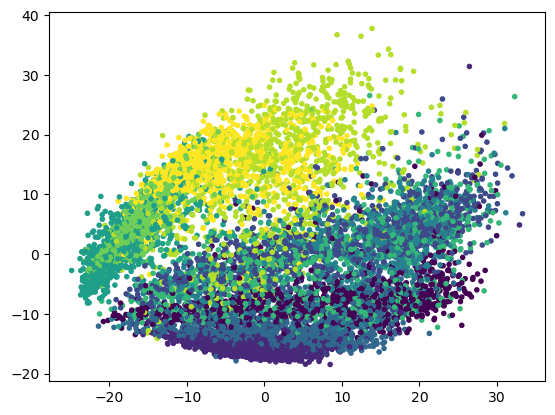

In [7]:
scaler = StandardScaler()
train_subset_scaled = scaler.fit_transform(train_subset)

model = PCA() ## Do parameter tunong if you have time

data_pca = model.fit_transform(train_subset_scaled)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = labels_subset, marker='.')

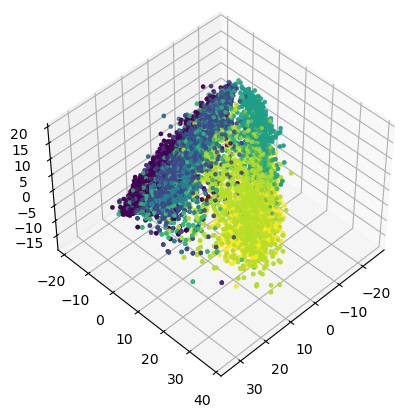

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the data points based on the labels
for i in range(3):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c = labels_subset, marker='.')

ax.view_init(elev=45, azim=45)

### 1.2: Perform kernel PCA

In [9]:
# kernel_pca = KernelPCA(kernel="rbf", n_components=10)

# data_pca_kernel = kernel_pca.fit_transform(train_subset_scaled)
#plt.scatter(data_pca_kernel[:, 0], data_pca_kernel[:, 1], c = labels_subset, marker='.')

In [10]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Color the data points based on the labels
# for i in range(3):
#     ax.scatter(data_pca_kernel[:, 0], data_pca_kernel[:, 1], data_pca_kernel[:, 2], c = labels_subset, marker='.')

# ax.view_init(elev=30, azim=0)

### 1.3 Hyperparameter Tuning

In [11]:
# # Plot eigenvalues
# eigvals = kernel_pca.eigenvalues_
# plt.bar(range(1, len(eigvals) + 1), eigvals)

In [12]:
gamma_values = [i for i in np.linspace(0.1, 1, 10)]
eigvals = []

for gamma, c in zip(gamma_values, range(len(gamma_values))):
    print(f"gamma = {gamma}, c={c}")
    kernel_pca = KernelPCA(kernel="rbf", n_components=10, gamma=gamma)
    data_pca_kernel = kernel_pca.fit_transform(train_subset_scaled)
    eigvals.append(kernel_pca.eigenvalues_) 

gamma = 0.1, c=0


#### Plotting the results

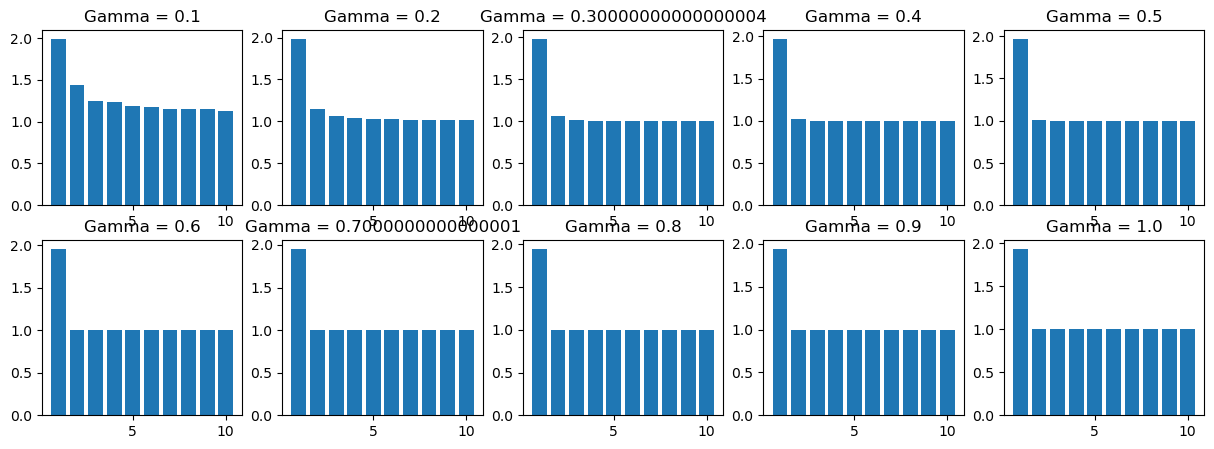

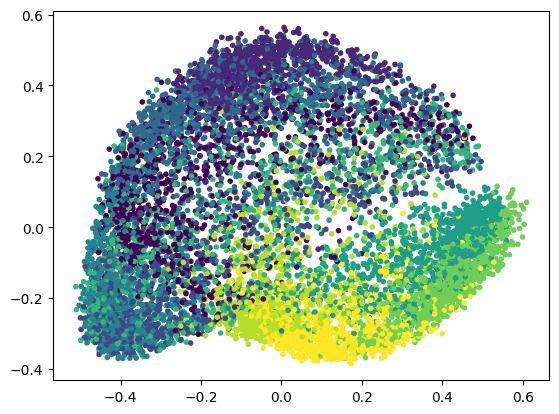

In [ ]:
fig,ax = plt.subplots(2, 5, figsize=(15, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].bar(range(1, len(eigvals[i * 5 + j]) + 1), eigvals[i * 5 + j])
        ax[i, j].set_title("Gamma = " + str(gamma_values[i * 5 + j]))

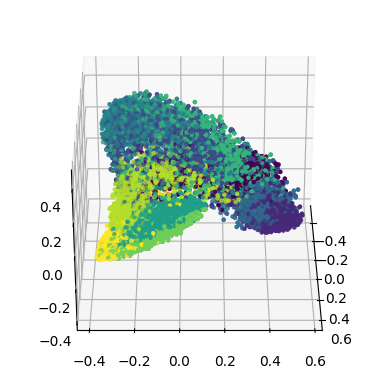

In [ ]:
fig,ax = plt.subplots(2, 5, figsize=(15, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].bar(range(1, len(eigvals[i * 5 + j]) + 1), eigvals[i * 5 + j])
        ax[i, j].set_title("Gamma = " + str(gamma_values[i * 5 + j]))

### 1.3 Trying a different kernel

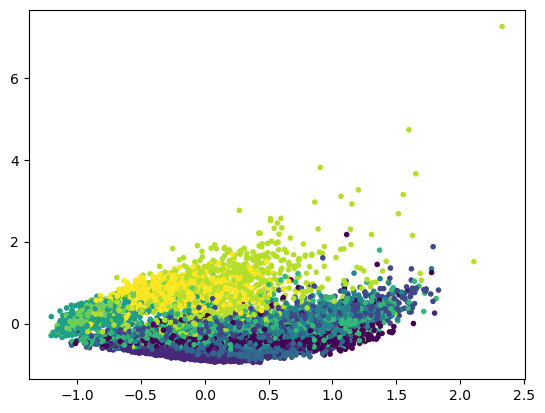

In [ ]:
# Trying the polynomial kernel
kernel_pca = KernelPCA(kernel="poly", n_components=10, degree=2)

data_pca_poly_kernel = kernel_pca.fit_transform(train_subset_scaled)
plt.scatter(data_pca_poly_kernel[:, 0], data_pca_poly_kernel[:, 1], c = labels_subset, marker='.')

### Perform parameter tuning

In [ ]:
gammas = np.arange(1/784 - 5 * (1/784) * (1/10), 1/784 + 5 * (1/784) * (1/10), (1/784) * (1/10))

n_components = 3
eigenvalues = np.empty((len(gammas), n_components))

for i in range(len(gammas)):
    kernel_pca = KernelPCA(kernel="rbf", n_components = n_components, gamma = gammas[i])
    eigenvalues[i] = kernel_pca.fit(train_subset_scaled).eigenvalues_

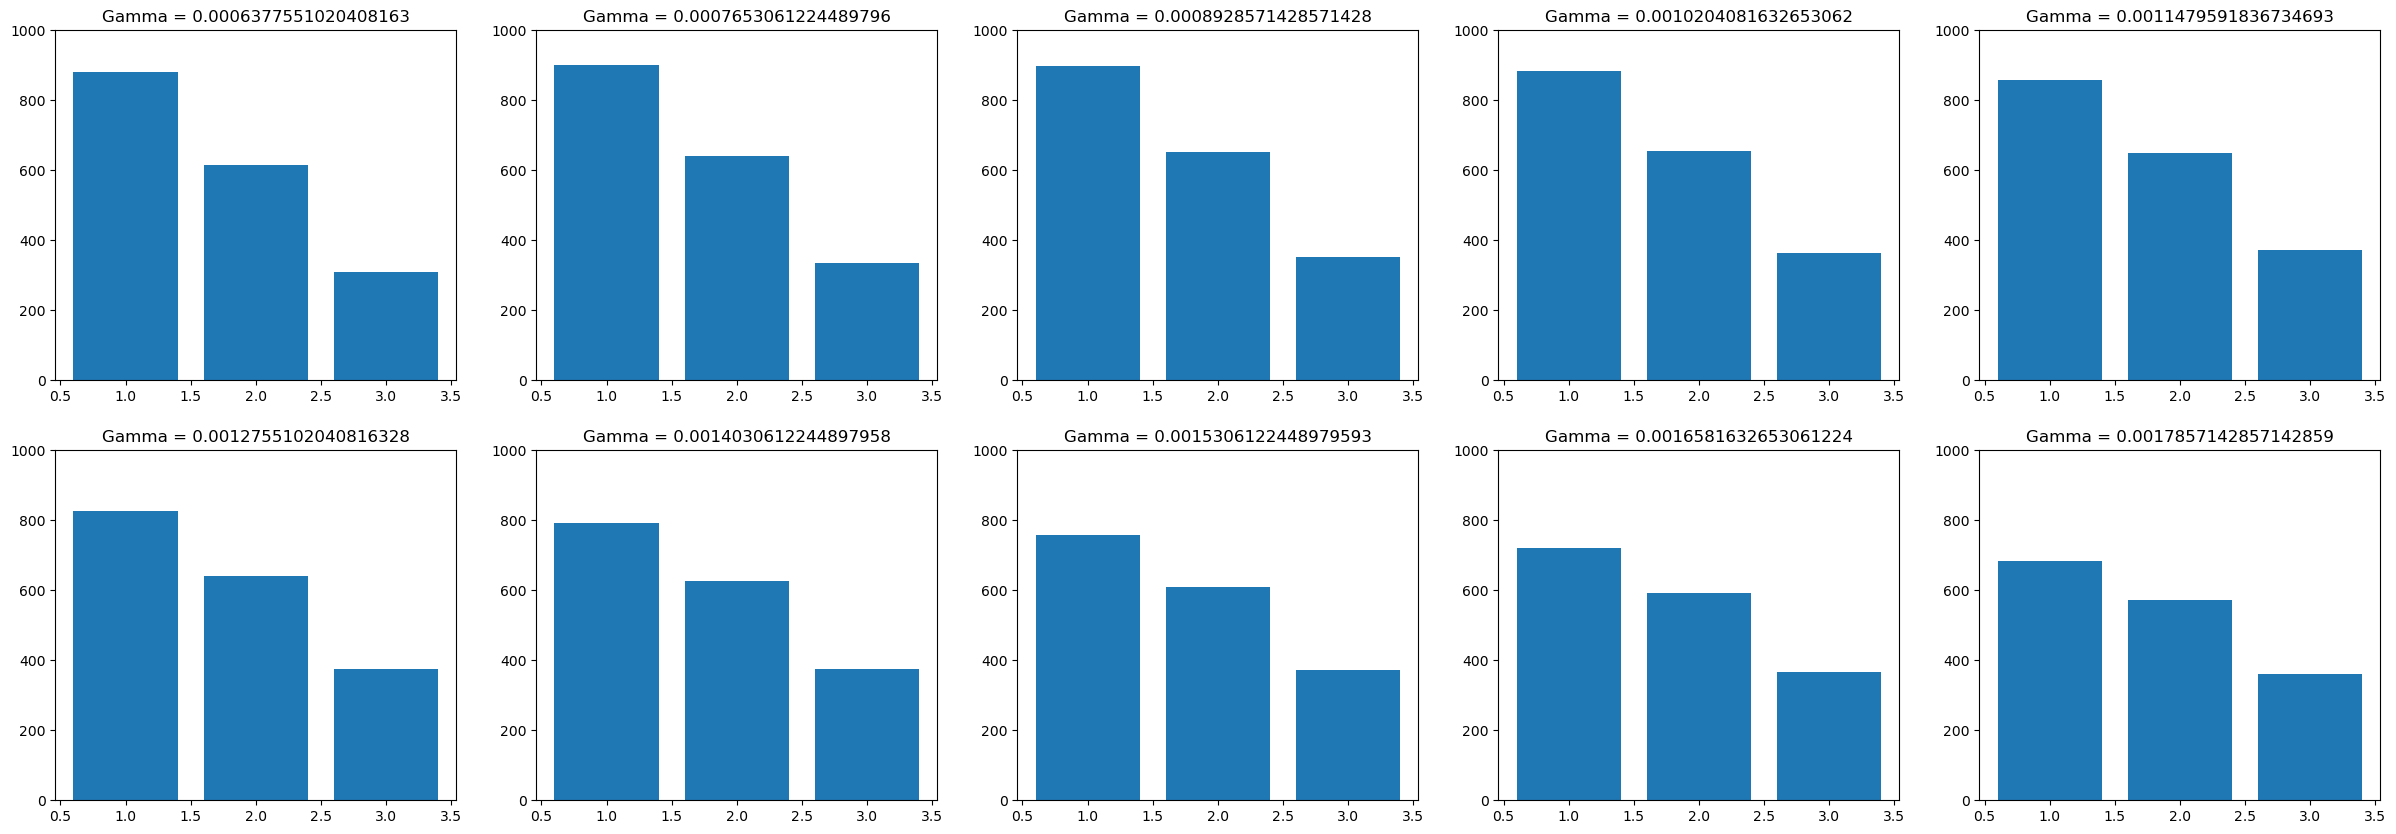

In [ ]:
# Create a figure and axis with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

# Create 10 random plots
for i, ax in enumerate(axs.flat):
    # Generate random data
    x = np.arange(1, len(eigenvalues[i, :]) + 1, 1)
    # Plot the data on the corresponding axis
    ax.bar(x, eigenvalues[i, :])
    ax.set_ylim(0, 1000)
    # ax.set_xlabel('Component')
    # ax.set_ylabel('Eigenvalue')
    ax.set_title('Gamma = ' + str(gammas[i]))

### 1.3 Perform kPCA using another kernel

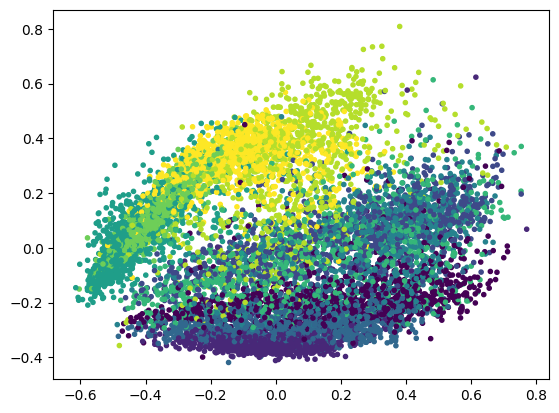

In [ ]:
kernel_pca = KernelPCA(kernel="sigmoid", n_components=3, degree=3)

data_pca_kernel = kernel_pca.fit_transform(train_subset_scaled)

plt.scatter(data_pca_kernel[:, 0], data_pca_kernel[:, 1], c = labels_subset, marker='.')

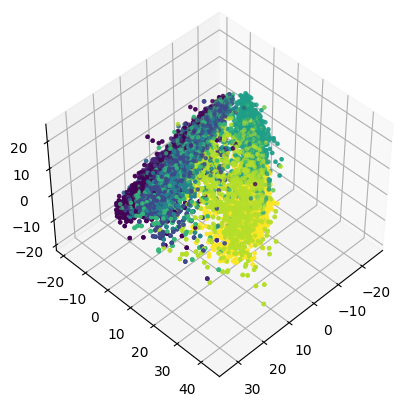

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the data points based on the labels
for i in range(3):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c = labels_subset, marker='.')

ax.view_init(elev=45, azim=45)

In [ ]:
degs = np.arange(1, 7, 1)

n_components = 3
eigenvalues = np.empty((len(degs), n_components))

for i in range(len(degs)):
    kernel_pca = KernelPCA(kernel="sigmoid", n_components = n_components, degree = degs[i])
    eigenvalues[i] = kernel_pca.fit(train_subset_scaled).eigenvalues_

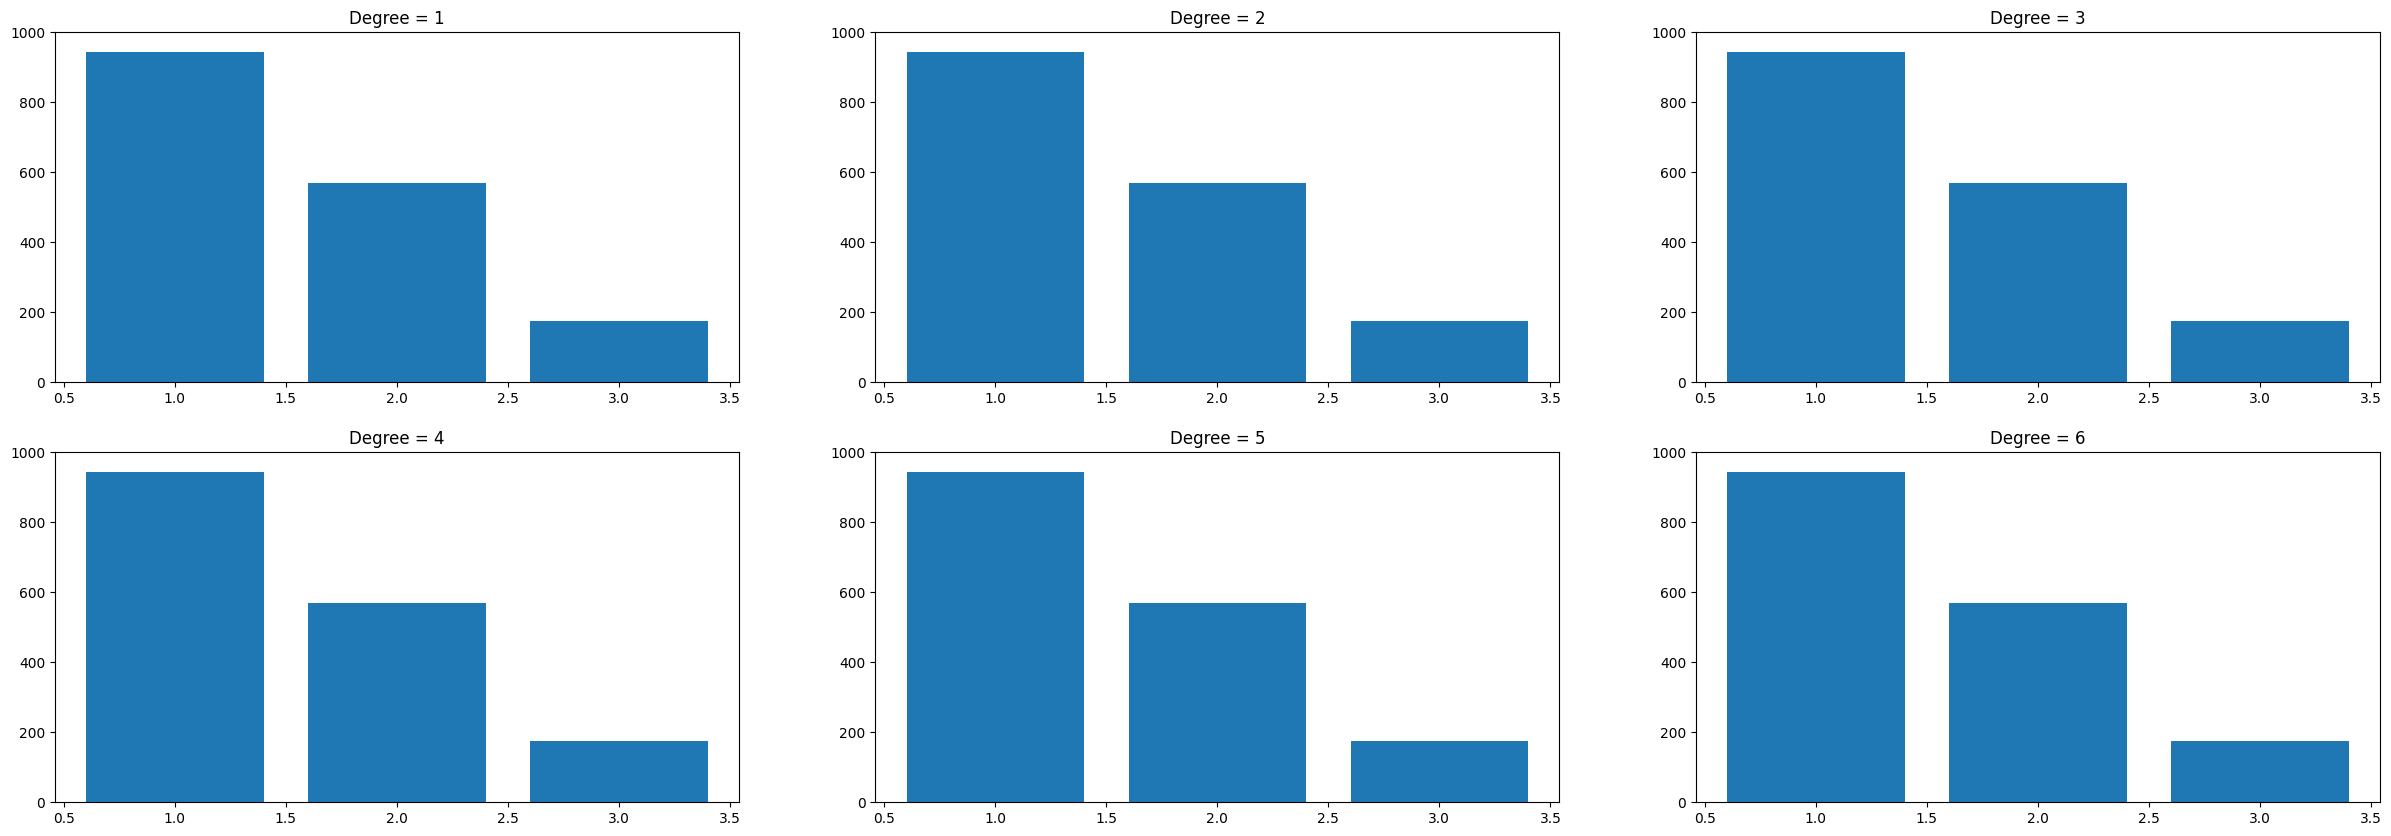

In [ ]:
# Create a figure and axis with 2 rows and 5 columns
fig, axs = plt.subplots(2, 3, figsize=(30, 10))

# Create 10 random plots
for i, ax in enumerate(axs.flat):
    # Generate random data
    x = np.arange(1, len(eigenvalues[i, :]) + 1, 1)
    # Plot the data on the corresponding axis
    ax.bar(x, eigenvalues[i, :])
    ax.set_ylim(0, 1000)
    # ax.set_xlabel('Component')
    # ax.set_ylabel('Eigenvalue')
    ax.set_title('Degree = ' + str(degs[i]))

## Section 2

### 1.2 